In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

li = pd.read_csv('List_of_Artificial_Objects_on_the_Moon.csv')
mi = pd.read_csv('Missions_by_date.csv')

In [2]:
li.sample(5)

,Unnamed: 0,Artificial object,Country,Year,Mass (lb),Mass (kg),Status,Location
71,71,LCROSS Shepherding Spacecraft,United States,2009,1500,700,Intentionally crashed,84°43′44″S 49°21′36″W﻿ / ﻿84.729°S 49.36°W
36,36,Luna 17 and Lunokhod 1,Soviet Union,1970,12300,5600,Landed,38°17′N 35°00′W﻿ / ﻿38.28°N 35.0°W
18,18,Lunar Orbiter 2,United States,1966,849,385,Crashed (post-mission),3°00′N 119°00′E﻿ / ﻿3.0°N 119°E
76,76,Chang'e 4 Yutu-2 rover,China,2019,2600,1200,Operational,45°27′22″S 177°35′19″E﻿ / ﻿45.4561°S 177.5885°E
39,39,Luna 19,Soviet Union,1971,4140,1880,Crashed,Unknown[a]


# Data Cleaning & Wrangling.

In [9]:
li.rename(columns = {'Unnamed: 0' : 'Index'}, inplace= True)
li.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88 entries, 0 to 87
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Index              88 non-null     int64 
 1   Artificial object  88 non-null     object
 2   Country            88 non-null     object
 3   Year               88 non-null     int64 
 4   Mass (lb)          88 non-null     int64 
 5   Mass (kg)          88 non-null     int64 
 6   Status             88 non-null     object
 7   Location           87 non-null     object
dtypes: int64(4), object(4)
memory usage: 5.6+ KB


In [12]:
#pd.isnull(li).sum()
li['Location'] = li['Location'].fillna("Unknown")
li['Location'] = li['Location'].replace('Unknown[a]','Unknown')

In [16]:
# pd.isnull(li).sum()
# li.info()

In [27]:
li.shape

(88, 8)

In [28]:
li.drop_duplicates(inplace=True)
li.shape

(88, 8)

In [17]:
mi.head()

,Mission,Spacecraft,Launch date,Carrier rocket,Operator,Mission type,Outcome
0,Pioneer 0 (Able I)[3],Pioneer 0,17-08-1958,Thor DM-18 Able,USAF,Orbiter,First attempted launch beyond Earth orbit; fai...
1,Luna E-1 No.1,Luna E-1 No.1,23-09-1958,Luna,OKB-1,Impactor,Failed to orbit; rocket disintegrated due to e...
2,Pioneer 1 (Able II)[3],Pioneer 1,11-10-1958,Thor DM-18 Able,NASA,Orbiter,Failed to orbit; premature second-stage cutoff...
3,Luna E-1 No.2,Luna E-1 No.2,11-10-1958,Luna,OKB-1,Impactor,Failed to orbit; carrier rocket exploded due t...
4,Pioneer 2 (Able III),Pioneer 2,08-11-1958,Thor DM-18 Able,NASA,Orbiter,Failed to orbit; premature second-stage cutoff...


In [18]:
mi.shape

(192, 7)

In [19]:
mi.drop_duplicates(inplace=True)
mi.shape

(192, 7)

In [20]:
pd.isnull(mi).sum()

Mission            0
Spacecraft         0
Launch date        0
Carrier rocket     0
Operator           0
Mission type       0
Outcome           29
dtype: int64

In [22]:
mi['Outcome'] = mi['Outcome'].fillna("Outcome not recorded")
# pd.isnull(mi).sum()

In [39]:
mi['Launch date'] = pd.to_datetime(mi['Launch date'], dayfirst=True)
mi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192 entries, 0 to 191
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Mission         192 non-null    object        
 1   Spacecraft      192 non-null    object        
 2   Launch date     192 non-null    datetime64[ns]
 3   Carrier rocket  192 non-null    object        
 4   Operator        192 non-null    object        
 5   Mission type    192 non-null    object        
 6   Outcome         192 non-null    object        
dtypes: datetime64[ns](1), object(6)
memory usage: 10.6+ KB


No more null or duplicate values are left in both datasets. now we move towards the Analysis part.

In [31]:
li[['Artificial object','Mass (kg)']].sort_values(['Mass (kg)'], ascending=False)

,Artificial object,Mass (kg)
43,Apollo 15 S-IVB (S-IVB-510),14036
40,Apollo 14 S-IVB (S-IVB-509),14016
49,Apollo 16 S-IVB (S-IVB-511),14002
54,Apollo 17 S-IVB (S-IVB-512),13960
37,Apollo 13 S-IVB (S-IVB-508)[41],13454
...,...,...
47,Apollo 15 subsatellite,36
53,Apollo 16 subsatellite,36
67,Moon Impact Probe (MIP) Chandrayaan-1,35
83,Manfred Memorial Moon Mission,14


We can infer that Apollo 15 S-IVB (S-IVB-510) is the heaviest object to go on the Moon and it weighs 14036kgs and the lightest object to go on the Moon as per this data is the Hagoromo Hiten which weighs 12kgs.

In [34]:
# li['Artificial object'].unique()

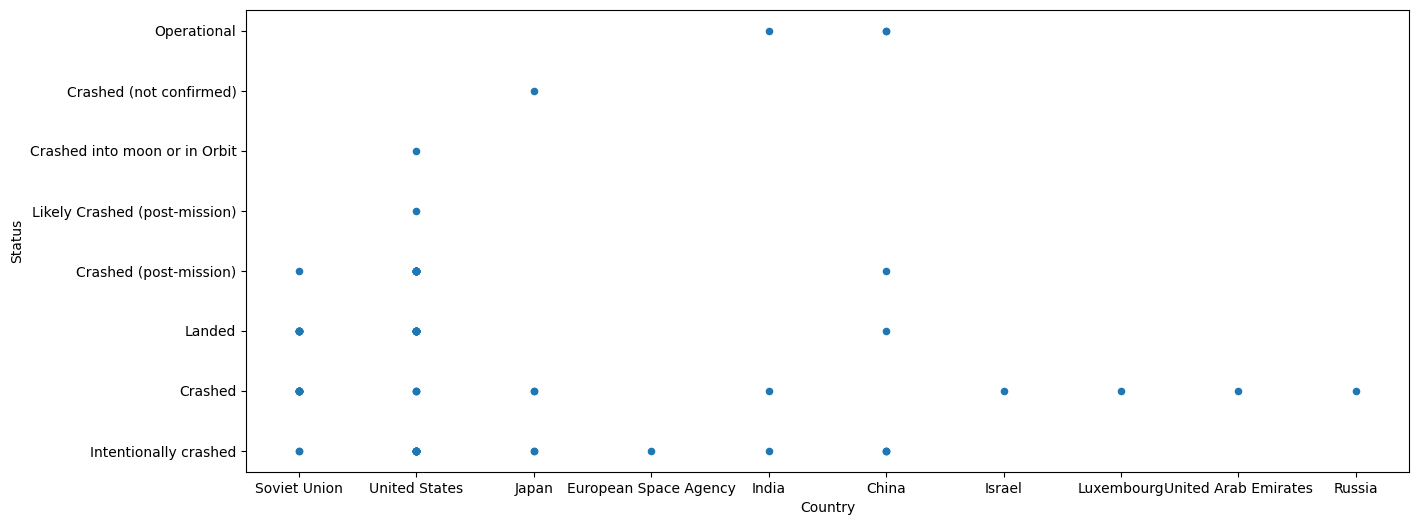

In [35]:
li.plot.scatter(y='Status',x='Country', alpha = 1.0, fontsize=10, figsize=[15,6])
plt.show()

This graph shows the status/outcome of the artificial objects sent by various countries to the Moon.
From this we can tell that the US has sent the most number of objects to the Moon, most of which have crashed.

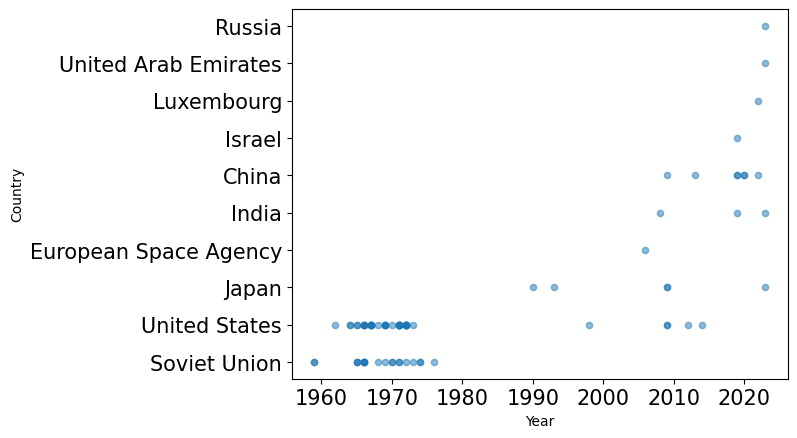

In [36]:
li.plot.scatter(x='Year',y='Country', alpha = 0.5, fontsize=15)
plt.show()

As we can see, the Soviet Union and the US used to send the most number of objects to the Moon earlier during the 60s and 70s and Japan followed almost 2 decades later in the 90s. After that the European Space Agency, India and China started doing the same since the late 2000s.

# Space Agencies and the number of objects they have launched on the Moon.

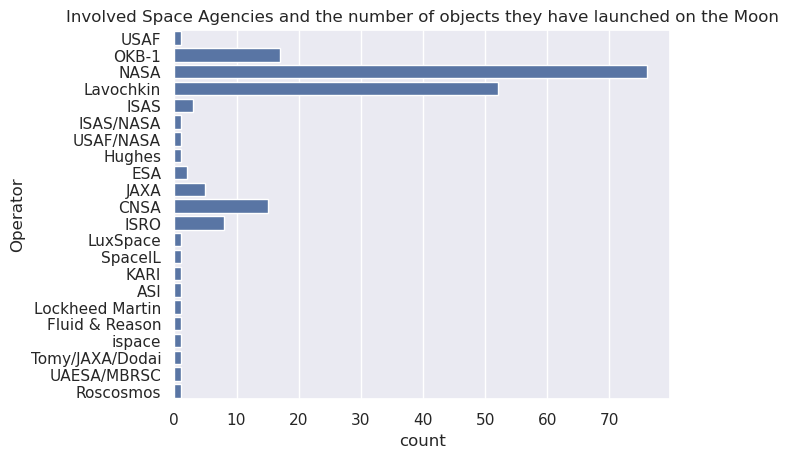

In [41]:
sns.set_theme(style='darkgrid')
ax = sns.countplot(data=mi,y='Operator').set(title="Involved Space Agencies and the number of objects they have launched on the Moon")

So from the above data and plot we can say that NASA has sent the most number of objects to the Moon with Lavochkin following not far behind.

# Types of Moon Missions

[Text(0.5, 1.0, 'Count of Mission types to the Moon')]

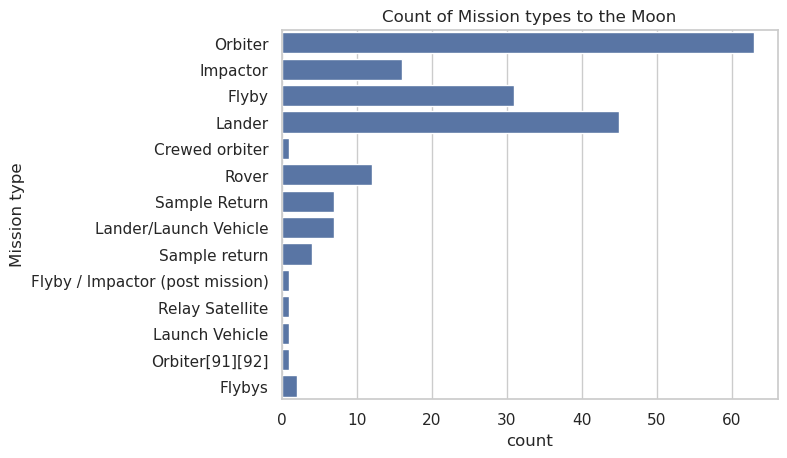

In [43]:
sns.set_theme(style="whitegrid")
sns.countplot(data=mi, y='Mission type').set(title="Count of Mission types to the Moon")

Here, it can be inferred that Orbiters, Landers and Flybys are the most common types of missions undertaken by the space agencies via their objects. And Impactors are lesser in number compared to these 3 mission types.

# Final Conclusions / Insights from this data:

The following conclusions can be made from the above detailed analysis about the Earth's Moon.

- Apollo 15 S-IVB (S-IVB-510) is the heaviest object on the Moon (14036kgs). It was sent by the US.
- Hagoromo Hiten is the lightest object (12kgs). It was sent by Japan.
- The US has sent the most number of objects to the Moon, most of which have crashed.
- The Soviet Union(Lavochkin) and the USA(NASA) used to send the most number of objects to the Moon earlier during the 60s and 70s and Japan followed almost 2 decades later in the 90s.
- Orbiters, Landers and Flybys are the most common types of missions undertaken by space agencies around the world.